In [1]:
import pandas as pd

In [162]:
df = pd.read_csv('online_shoppers_intention.csv')

# EDA

In [291]:
uniques = df.nunique(axis=0)
uniques

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Bought_product                2
dtype: int64

In [128]:
df.isna().count()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [398]:
df.columns.value_counts()

Administrative             1
Administrative_Duration    1
Weekend                    1
VisitorType                1
TrafficType                1
Region                     1
Browser                    1
OperatingSystems           1
Month                      1
SpecialDay                 1
PageValues                 1
ExitRates                  1
BounceRates                1
ProductRelated_Duration    1
ProductRelated             1
Informational_Duration     1
Informational              1
Bought_product             1
dtype: int64

In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [445]:
df.dropna(inplace=True)

In [163]:
df.rename(columns={'Revenue':'Bought_product'}, inplace=True)

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Setting up the target, X, and Y variables

target = 'Bought_product'

X = df.drop(target, axis=1)
Y = df[target]

# test train split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

In [12]:
# Seperating data into cat and num features and then making preprocessor

num_features = X.select_dtypes('number').columns

num_trans = make_pipeline(StandardScaler())

cat_features = X.select_dtypes('object','bool').columns

cat_trans = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer((num_trans, num_features),(cat_trans, cat_features))

In [187]:
# Finding best machine model

clf = LogisticRegression()

classifiers = [LogisticRegression(),
              DecisionTreeClassifier()
              , RandomForestClassifier()
              , SVC()
              , KNeighborsClassifier()]

# looping through classifiers

for i in classifiers:
    pipe = make_pipeline(preprocessor, i)
    grid = GridSearchCV(pipe, cv=5, param_grid={}, scoring='accuracy')
    grid.fit(X_train, Y_train)
    
    print(f'{i} score: {grid.best_score_}')

/Users/ciaranlynch/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() score: 0.8875710016253912
DecisionTreeClassifier() score: 0.8591853100014495
RandomForestClassifier() score: 0.9021691414213586
SVC() score: 0.8951748194952345
KNeighborsClassifier() score: 0.8777374371458915


In [213]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__standardscaler__copy', 'columntransformer__pipeline-1__standardscaler__with_mean', 'columntransformer__pipeline-1__standardscaler__with_std', 'columntransformer__pipeline-2__memory', 'columntransformer__pipeline-2__steps', 'columntransformer__pipeline-2__verbose', 'columntransformer__pipeline-2__onehotencoder', 'columntransformer__pipeline-2__onehotencoder__categories', 'columntransfo

In [215]:
import numpy as np

In [14]:
# Random Forest Classifier

RFC_clf = RandomForestClassifier()

# TUNING THE HYPERPARAMETERS

# Create the random grid

param_grid_rf = {
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
    ,'randomforestclassifier__max_depth': [10, 50, None]
    ,'randomforestclassifier__n_estimators': [100, 200, 500]
    }
pipe = make_pipeline(preprocessor, RFC_clf)
grid_RFC = GridSearchCV(pipe, cv=5, param_grid=param_grid_rf , scoring='accuracy')
grid_RFC.fit(X_train, Y_train)

print(f'Best score: {grid_RFC.best_score_}')
print(f'Best parameter: {grid_RFC.best_params_}')

Best score: 0.907644118520925
Best parameter: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 100}


In [21]:
# SVC

SVC_clf = SVC()

SVCparam_grid = {
    'svc__C': [0.1, 1, 10, 100, 1000]
    , 'svc__gamma':[1, 0.1, 0.001, 0.0001]
}

pipe = make_pipeline(preprocessor, SVC_clf)
grid_SVC = GridSearchCV(estimator=pipe, param_grid=SVCparam_grid, scoring='accuracy')
grid_SVC.fit(X_train, Y_train)

print('Best score: ', grid_SVC.best_score_)
print('Best params: ', grid_SVC.best_params_)

Best score:  0.895884655835524
Best params:  {'svc__C': 1000, 'svc__gamma': 0.001}


## Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page calculated over the value of the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Bought_Product: A boolean representing whether or not the user completed the purchase.

In [60]:
# regression could be any numerical target var e.g. stock price

# classification could be for example boolean or when there are different countries

# DATA VISUALISATION

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

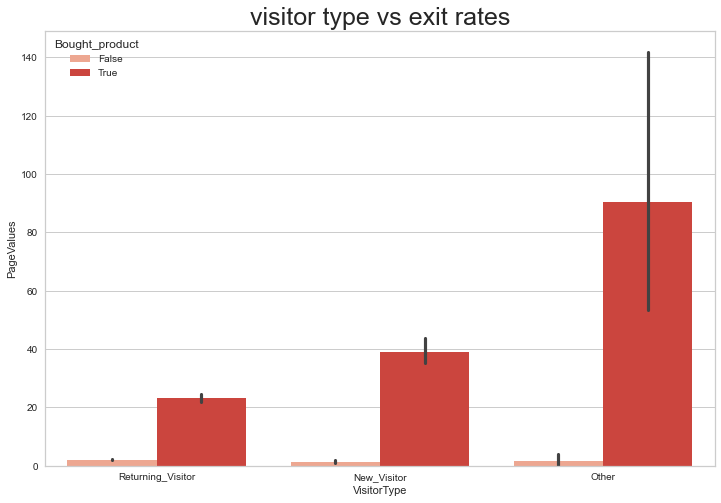

In [432]:
plt.rcParams['figure.figsize'] = (12, 8)

sns.barplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Bought_product'], palette = 'Reds')
plt.title('visitor type vs exit rates', fontsize = 25)
plt.show()

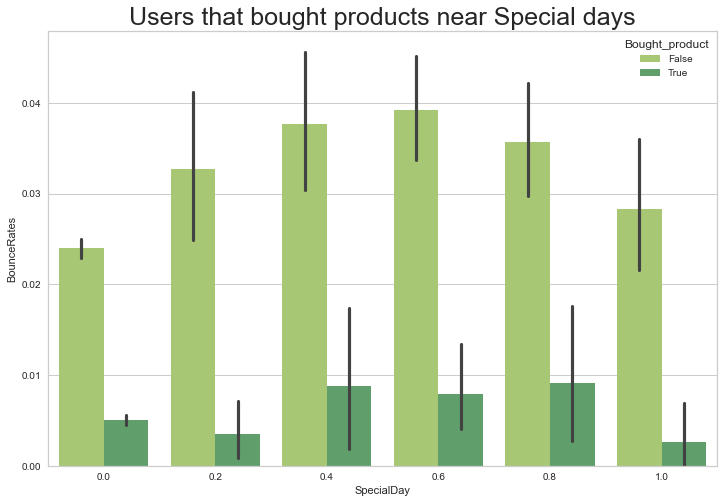

In [431]:
plt.rcParams['figure.figsize'] = (12, 8)

sns.barplot(x = df['SpecialDay'], y = df['BounceRates'], hue = df['Bought_product'], palette = 'summer_r')
plt.title('Users that bought products near Special days', fontsize = 25)
plt.show()

In [433]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/931632394.py:3: UserWarning: DelftStack
  warnings.warn('DelftStack')


/Users/ciaranlynch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Total Correct Predictions for if customers bought product (RFC): 2205
Total Incorrect Predictions for if customers bought product (RFC): 261
Accuracy Rate (RFC): 90.7644118520925%


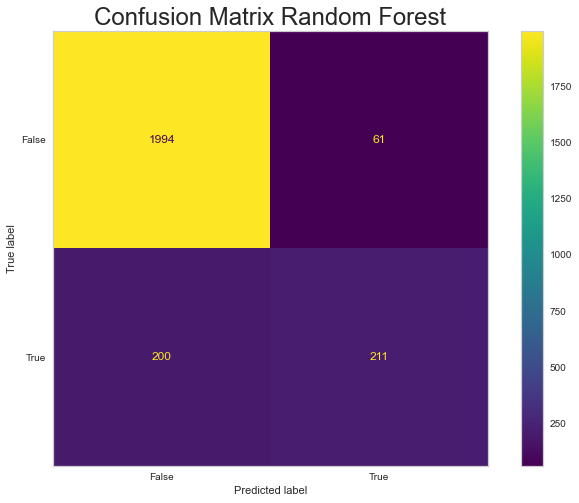

In [450]:
# showing reliability of RandomForestModel through confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
plot_confusion_matrix(grid_RFC.best_estimator_, X_test, Y_test)
plt.title('Confusion Matrix Random Forest', fontsize=24)
plt.grid(None)
print(f'Total Correct Predictions for if customers bought product (RFC): {1994+211}')
print(f'Total Incorrect Predictions for if customers bought product (RFC): {200+61}')
print(f'Accuracy Rate (RFC): {grid_RFC.best_score_*100}%')

/Users/ciaranlynch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Total Correct Predictions for customers buying product (SVC): 2171
Total Incorrect Predictions for customers buying product (SVC): 295
Accuracy Rate (SVC): 89.5884655835524%


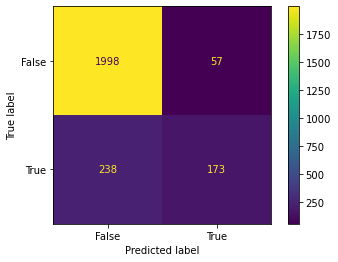

In [34]:
# showing reliability of SVC model through confusion matrix

plot_confusion_matrix(grid_SVC.best_estimator_, X_test, Y_test)
print(f'Total Correct Predictions for customers buying product (SVC): {1998+173}')
print(f'Total Incorrect Predictions for customers buying product (SVC): {238+57}')
print(f'Accuracy Rate (SVC): {grid_SVC.best_score_*100}%')

# Final Evaluation

In [154]:
grid_SVC.best_estimator_.score(X_test, Y_test)

0.8803730738037308

In [155]:
grid_RFC.best_estimator_.score(X_test, Y_test)

0.8941605839416058

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Bought_product'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/2326495013.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Customer Types vs Purchasing Patterns', transparent=True, bboxinches='tight')


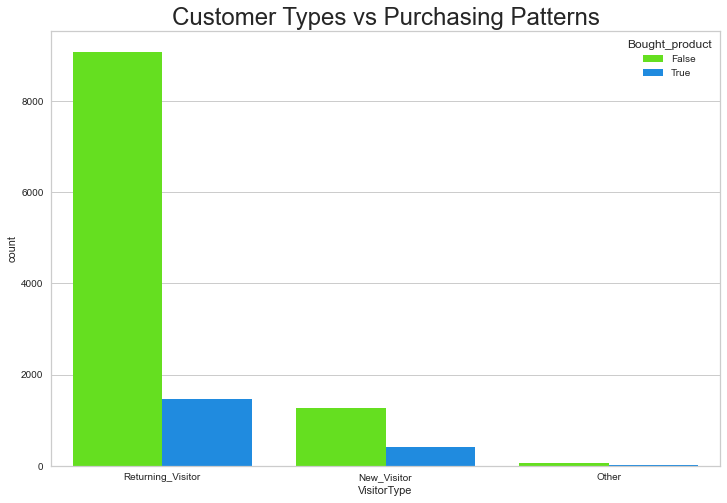

In [414]:
plt.figure(figsize = (12,8))
sns.countplot(data=df, x='VisitorType', hue='Bought_product', palette='gist_rainbow')
plt.title('Customer Types vs Purchasing Patterns', fontsize=24)
plt.savefig('Customer Types vs Purchasing Patterns', transparent=True, bboxinches='tight')
plt.show()

# CREATING A CLUSTER

In [136]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import seaborn as sns

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/800246306.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Collinearity Issue', transparent=True, bboxinches='tight')


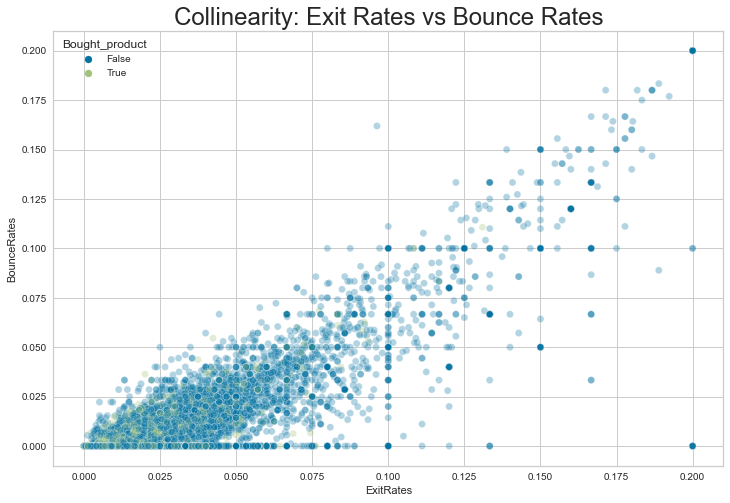

In [413]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Bought_product',alpha=0.3)
plt.title('Collinearity: Exit Rates vs Bounce Rates', fontsize=24)
# BounceRates: The percentage of visitors who enter the website 
# and exit without triggering any additional tasks.

# ExitRates: The percentage of pageviews on the website.

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/2604530897.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Purchasing Patterns Per Month', transparent=True, bboxinches='tight')


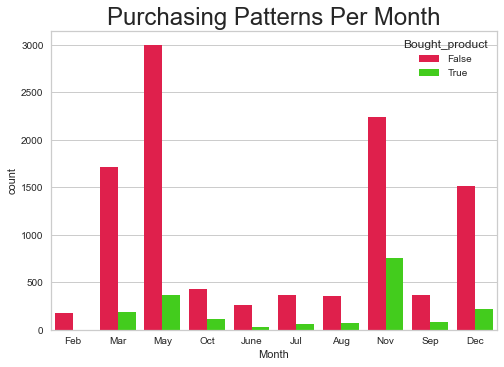

In [412]:
# CountPlot

sns.countplot(data=df,x='Month',hue='Bought_product', palette='prism_r')
plt.title('Purchasing Patterns Per Month', fontsize=24)

# SAVED

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/477799794.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Heatmap for correlations of columns', transparent=True, bboxinches='tight')


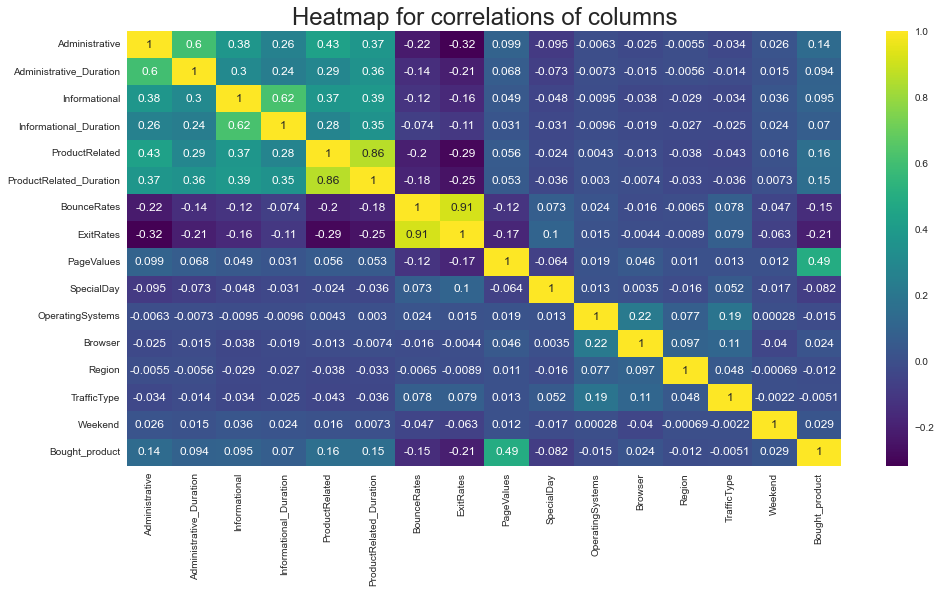

In [410]:
# Heatmap

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap for correlations of columns', fontsize=24)
plt.savefig('', transparent=True, bboxinches='tight')

# SAVED

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/397666792.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Weekend vs Weekday purchasing patterns', transparent=True, bboxinches='tight')


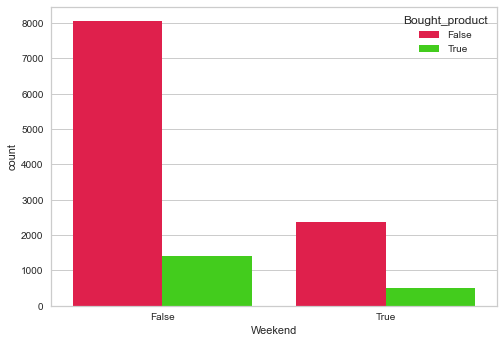

In [405]:
sns.countplot(data=df,x='Weekend',hue='Bought_product', palette='prism_r')

# SAVED

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/3401589437.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('PageValue correlation with ProductRelated', transparent=True, bboxinches='tight')


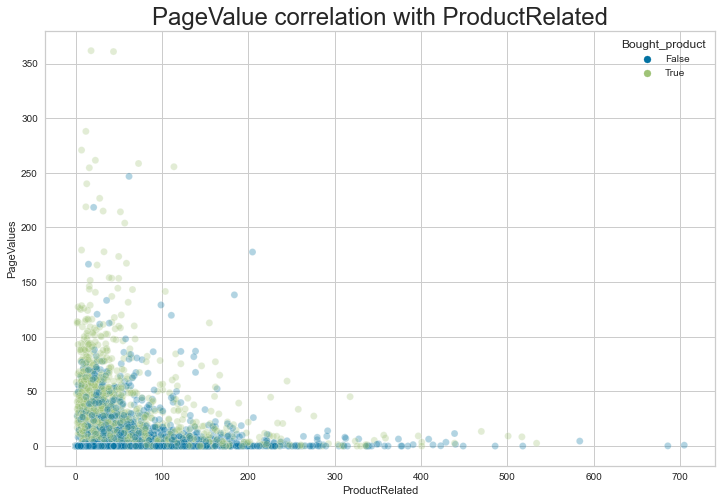

In [441]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='ProductRelated',y='PageValues', hue='Bought_product',alpha=0.3)
plt.title('PageValue correlation with ProductRelated', fontsize=24)

# plt.savefig('PageValue correlation with ProductRelated', transparent=True, bboxinches='tight')

/Users/ciaranlynch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/3966783966.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Transactions completed or not', transparent=True, bboxinches='tight')


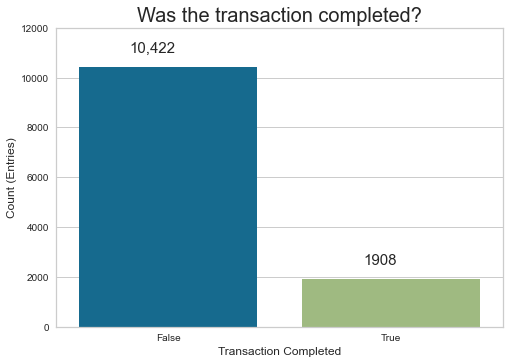

In [404]:
sns.countplot(df['Bought_product'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 20)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()
# SAVED

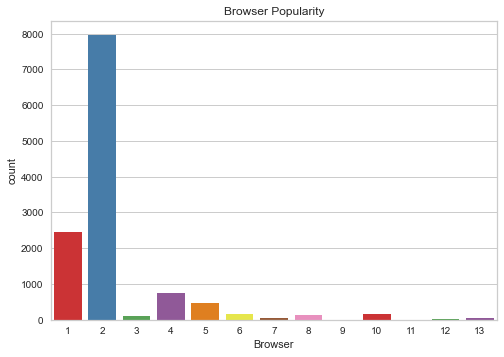

In [399]:
sns.countplot(data=df, x='Browser', palette='Set1')
plt.title('Browser Popularity')

/Users/ciaranlynch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'function' object has no attribute 'BBox'

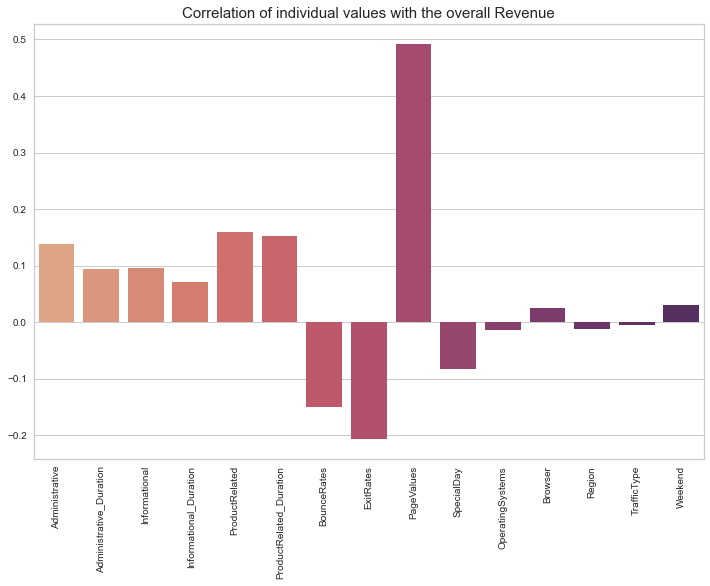

In [438]:
data_corr = df.corr()['Bought_product'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values, palette='flare')
plt.title('Correlation of individual values with the overall Revenue', fontsize=15)
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.savefig('', transparent=True)

plt.show()

Text(0.5, 1.0, 'Distribution of visitors')

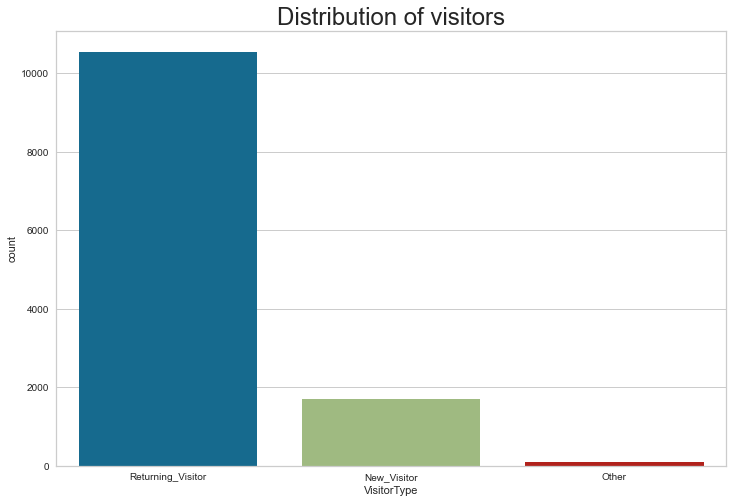

In [422]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='VisitorType')
plt.title('Distribution of visitors', fontsize=24)

In [326]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Bought_product'],
      dtype='object')

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/2025214734.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('BounceRates vs ExitRates', transparent=True, bboxinches='tight')


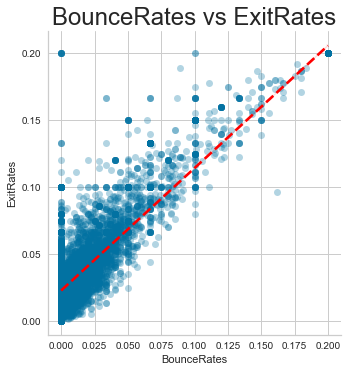

In [427]:
sns.lmplot(x="BounceRates", y="ExitRates", data=df, 
           scatter_kws={'alpha':0.3}, 
           line_kws={'color':'red', 'ls':'--'})
plt.title('BounceRates vs ExitRates', fontsize=24)
plt.show()
# BounceRates: The percentage of visitors who enter the website 
# and exit without triggering any additional tasks.

# ExitRates: The percentage of pageviews on the website.


/var/folders/y7/y2_lwmvj36d5qt2l09g2wcdm0000gn/T/ipykernel_56776/199737119.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bboxinches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Bounce Rates based upon customers', transparent=True, bboxinches='tight')


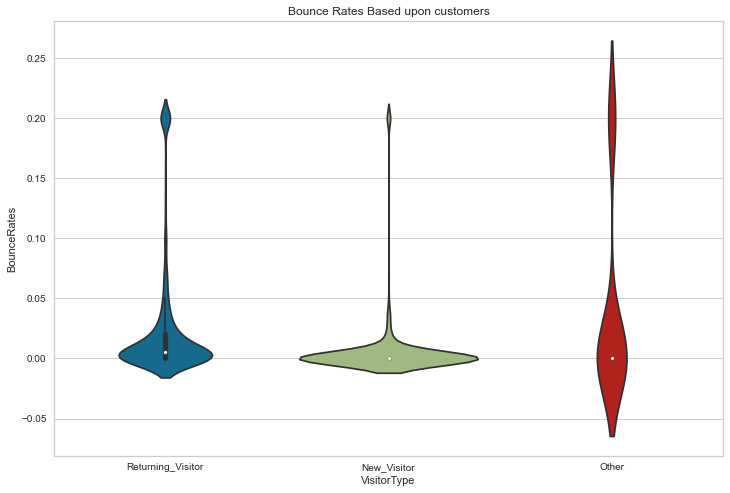

In [428]:
plt.figure(figsize=(12,8))
sns.violinplot(x='VisitorType', y='BounceRates', data=df,
                split=True)
plt.title('Bounce Rates Based upon customers')
plt.savefig('Bounce Rates based upon customers', transparent=True, bboxinches='tight')

# BounceRates: The percentage of visitors who enter the website 
# and exit without triggering any additional tasks.

In [ ]:
# Multicollinearity issue due to 